In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
csv = pd.read_csv('GlobalTemperatures.csv')
csv.head(3)

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning and formating Data

In [3]:
csv['dt'] = pd.to_datetime(csv['dt'])

df = csv[csv['dt'] >= '1850-01-01']
df.reset_index(drop=True, inplace=True)
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249
...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [4]:
df.isnull().sum()

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [5]:
df['dt'] = pd.to_datetime(df['dt'])

C:\Users\Fiona A\AppData\Local\Temp\ipykernel_11288\2526154526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'] = pd.to_datetime(df['dt'])


In [6]:
new_column_names = {
    'LandAverageTemperature': 'AvgTemp',
    'LandMaxTemperature': 'MaxTemp',
    'LandMinTemperature': 'MinTemp',
    'LandAndOceanAverageTemperature': 'GlobalAvgTemp'
}
df.rename(columns=new_column_names, inplace=True)


C:\Users\Fiona A\AppData\Local\Temp\ipykernel_11288\1966715503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=new_column_names, inplace=True)


In [7]:
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

C:\Users\Fiona A\AppData\Local\Temp\ipykernel_11288\4119565191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['dt'].dt.year
C:\Users\Fiona A\AppData\Local\Temp\ipykernel_11288\4119565191.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['dt'].dt.month


In [8]:
df

,dt,AvgTemp,LandAverageTemperatureUncertainty,MaxTemp,LandMaxTemperatureUncertainty,MinTemp,LandMinTemperatureUncertainty,GlobalAvgTemp,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5
...,...,...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11


# Tendencias

In [9]:
df

,dt,AvgTemp,LandAverageTemperatureUncertainty,MaxTemp,LandMaxTemperatureUncertainty,MinTemp,LandMinTemperatureUncertainty,GlobalAvgTemp,LandAndOceanAverageTemperatureUncertainty,Year,Month
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5
...,...,...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015,11


## Long term estacional

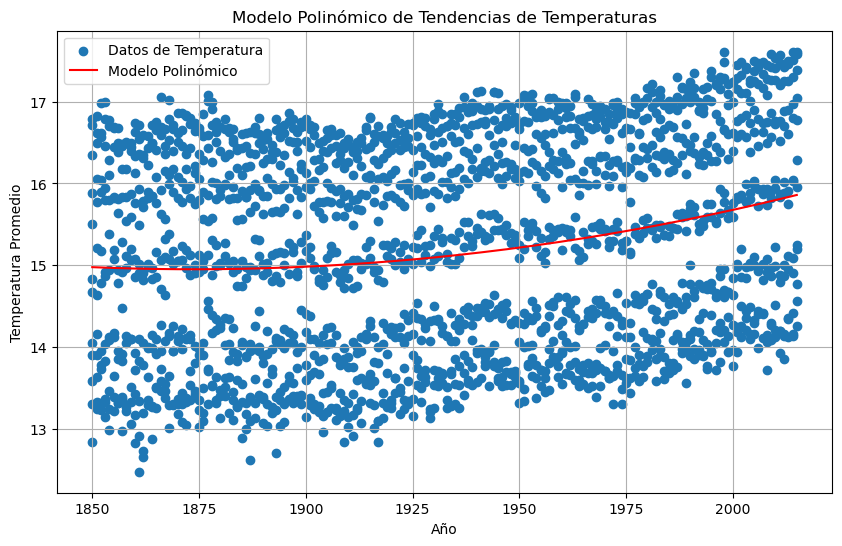

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Selecciona las columnas que deseas usar
year = df["Year"]
temperature_column = df["GlobalAvgTemp"]  # Por ejemplo, puedes elegir esta columna

# Crear una instancia del transformador polinómico
poly_transform = PolynomialFeatures(degree=2)  # Grado 2 para un modelo cuadrático
X_poly = poly_transform.fit_transform(year.values.reshape(-1, 1))  # Transformar los años a características polinómicas

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_poly, temperature_column)

# Predecir valores
predicted_temperatures = model.predict(X_poly)

# Crear un gráfico de los datos y el modelo polinómico
plt.figure(figsize=(10, 6))
plt.scatter(year, temperature_column, label='Datos de Temperatura')
plt.plot(year, predicted_temperatures, color='red', label='Modelo Polinómico')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio')
plt.title('Modelo Polinómico de Tendencias de Temperaturas')
plt.legend()
plt.grid(True)
plt.show()

### Descomposicion estacional

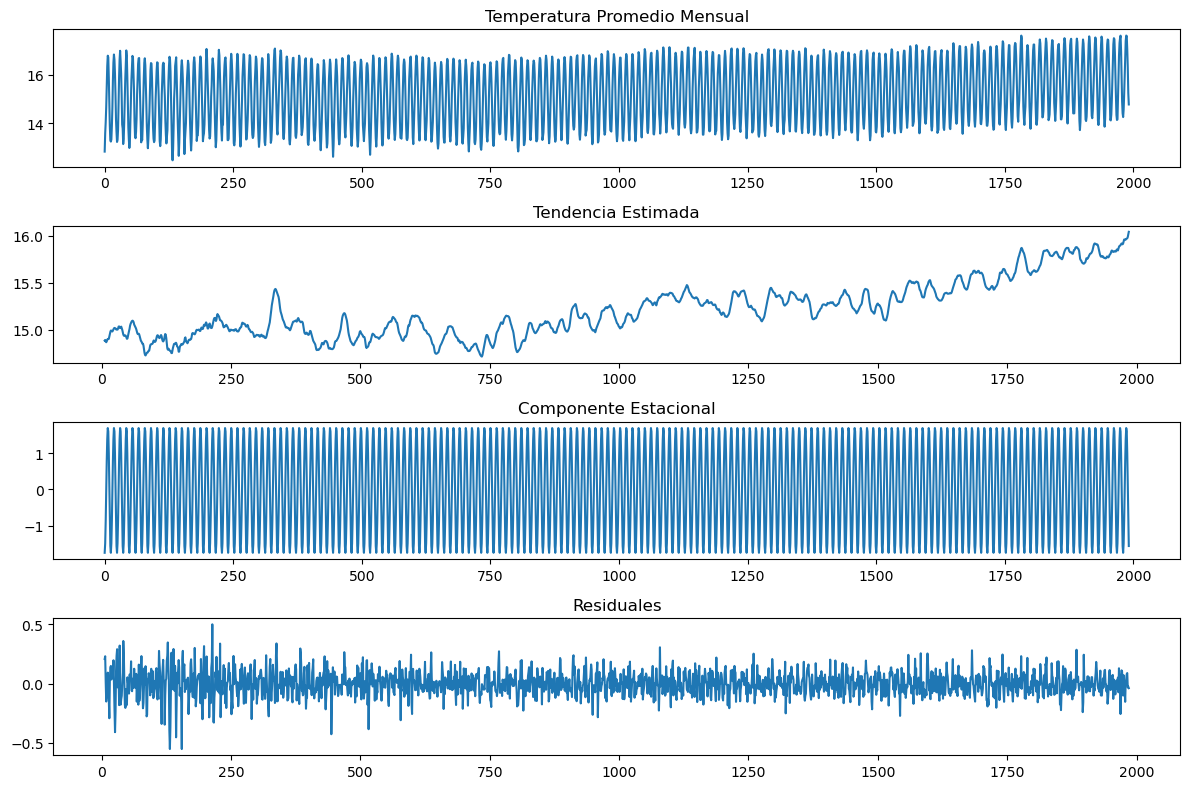

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Carga tus datos (reemplaza con tus datos)
# df = ...

# Selecciona la columna de temperatura que deseas analizar
temperature_column = df["GlobalAvgTemp"]

# Realiza la descomposición estacional
result = seasonal_decompose(temperature_column, model='additive', period=12)  # Periodo de 12 para tratar con estacionalidad anual

# Gráficos de la descomposición
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(temperature_column)
plt.title('Temperatura Promedio Mensual')

plt.subplot(4, 1, 2)
plt.plot(result.trend)
plt.title('Tendencia Estimada')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(result.resid)
plt.title('Residuales')

plt.tight_layout()
plt.show()


#### Tendencia estimada

La "tendencia estimada" que se obtiene como resultado de la descomposición estacional es una representación suavizada de los datos originales, donde se han eliminado los efectos estacionales y se han dejado los componentes de tendencia y residuales. La tendencia estimada muestra cómo cambia la variable a lo largo del tiempo, excluyendo las fluctuaciones regulares causadas por la estacionalidad.

- Tendencias Generales: Puedes observar si las temperaturas tienden a aumentar, disminuir o mantenerse relativamente estables a lo largo del período de tiempo en tus datos.

- Ciclos de Largo Plazo: Puedes detectar patrones de ciclos de largo plazo, como décadas más cálidas o más frías, que podrían indicar patrones climáticos.

- Cambios Graduales: Puedes identificar cambios graduales en las temperaturas que podrían estar relacionados con factores como el cambio climático.

- Fluctuaciones Atenuadas: La tendencia estimada te permite observar las fluctuaciones más suaves y a gran escala de tus datos, en contraposición a las fluctuaciones más rápidas y regulares que se deben a la estacionalidad.

Es importante recordar que la tendencia estimada es una representación simplificada y suavizada de los datos originales. Si estás interesado en detalles más específicos, como patrones estacionales, variaciones a corto plazo o eventos extremos, también es útil analizar los otros componentes resultantes de la descomposición estacional, como la componente estacional y los residuales.



#### Residuales

Rango pequeño, no tenemos que preocuparnos

## Long term group by years

In [12]:
import pandas as pd


grouped_data = df.groupby(['Year', 'Month']).mean()
yearly_avg_temps = grouped_data.groupby('Year').mean()
dataframe = yearly_avg_temps.reset_index()
dataframe['Decade'] = (dataframe['Year'] // 10) * 10

dataframe

C:\Users\Fiona A\AppData\Local\Temp\ipykernel_11288\1340957083.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby(['Year', 'Month']).mean()


,Year,AvgTemp,LandAverageTemperatureUncertainty,MaxTemp,LandMaxTemperatureUncertainty,MinTemp,LandMinTemperatureUncertainty,GlobalAvgTemp,LandAndOceanAverageTemperatureUncertainty,Decade
0,1850,7.900667,0.876417,13.476667,2.394833,1.964333,1.571167,14.867167,0.308167,1850
1,1851,8.178583,0.881917,13.081000,2.397250,2.203917,1.632417,14.991833,0.312083,1850
2,1852,8.100167,0.918250,13.397333,2.619250,2.337000,1.382917,15.006500,0.316417,1850
3,1853,8.041833,0.835000,13.886583,2.095083,1.892500,1.355583,14.955167,0.283833,1850
4,1854,8.210500,0.825667,13.977417,1.783333,1.762167,1.357000,14.991000,0.276417,1850
...,...,...,...,...,...,...,...,...,...,...
161,2011,9.516000,0.082000,15.284833,0.114333,3.827667,0.136583,15.769500,0.059000,2010
162,2012,9.507333,0.083417,15.332833,0.107333,3.756167,0.145333,15.802333,0.061500,2010
163,2013,9.606500,0.097667,15.373833,0.115500,3.911333,0.149833,15.854417,0.064667,2010
164,2014,9.570667,0.090167,15.313583,0.111667,3.877750,0.139000,15.913000,0.063167,2010


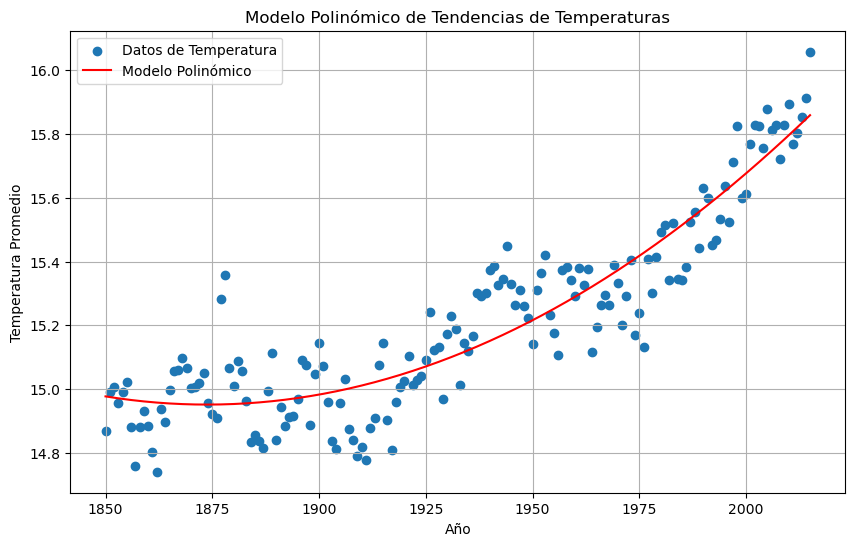

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Selecciona las columnas que deseas usar
year = dataframe["Year"]
temperature_column = dataframe["GlobalAvgTemp"]  # Por ejemplo, puedes elegir esta columna

# Crear una instancia del transformador polinómico
poly_transform = PolynomialFeatures(degree=2)  # Grado 2 para un modelo cuadrático
X_poly = poly_transform.fit_transform(year.values.reshape(-1, 1))  # Transformar los años a características polinómicas

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_poly, temperature_column)

# Predecir valores
predicted_temperatures = model.predict(X_poly)

# Crear un gráfico de los datos y el modelo polinómico
plt.figure(figsize=(10, 6))
plt.scatter(year, temperature_column, label='Datos de Temperatura')
plt.plot(year, predicted_temperatures, color='red', label='Modelo Polinómico')
plt.xlabel('Año')
plt.ylabel('Temperatura Promedio')
plt.title('Modelo Polinómico de Tendencias de Temperaturas')
plt.legend()
plt.grid(True)
plt.show()

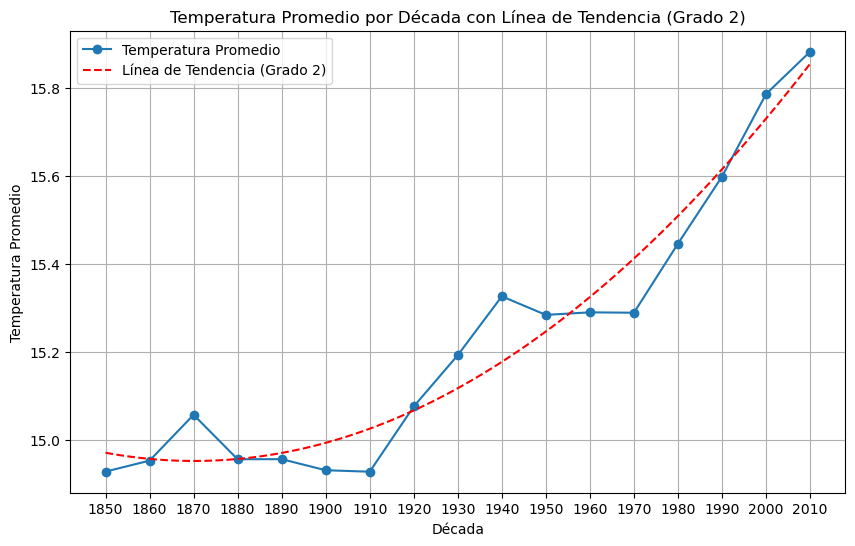

In [14]:
decade_grouped = dataframe.groupby('Decade')['GlobalAvgTemp'].mean().reset_index()

trend_line = np.polyfit(decade_grouped['Decade'], decade_grouped['GlobalAvgTemp'], 2)
trend_function = np.poly1d(trend_line)

trend_x = np.linspace(min(decade_grouped['Decade']), max(decade_grouped['Decade']), 100)


plt.figure(figsize=(10, 6))
plt.plot(decade_grouped['Decade'], decade_grouped['GlobalAvgTemp'], marker='o', label='Temperatura Promedio')
plt.plot(trend_x, trend_function(trend_x), '--', color='red', label='Línea de Tendencia (Grado 2)')
plt.xlabel('Década')
plt.ylabel('Temperatura Promedio')
plt.title('Temperatura Promedio por Década con Línea de Tendencia (Grado 2)')
plt.xticks(decade_grouped['Decade'])
plt.legend()
plt.grid(True)
plt.show()

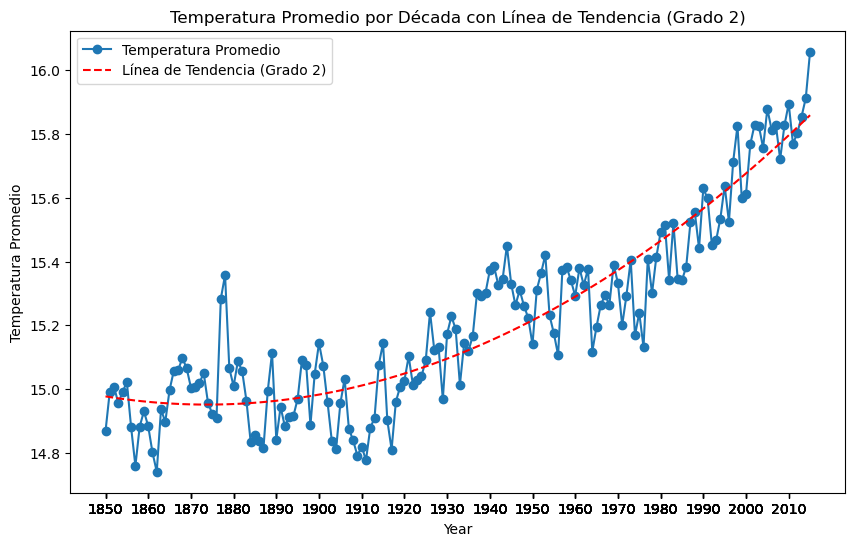

In [15]:
decade_grouped = dataframe.groupby('Year')['GlobalAvgTemp'].mean().reset_index()

trend_line = np.polyfit(decade_grouped['Year'], decade_grouped['GlobalAvgTemp'], 2)
trend_function = np.poly1d(trend_line)

trend_x = np.linspace(min(decade_grouped['Year']), max(decade_grouped['Year']), 100)


plt.figure(figsize=(10, 6))
plt.plot(decade_grouped['Year'], decade_grouped['GlobalAvgTemp'], marker='o', label='Temperatura Promedio')
plt.plot(trend_x, trend_function(trend_x), '--', color='red', label='Línea de Tendencia (Grado 2)')
plt.xlabel('Year')
plt.ylabel('Temperatura Promedio')
plt.title('Temperatura Promedio por Década con Línea de Tendencia (Grado 2)')
plt.xticks(dataframe['Decade'])
plt.legend()
plt.show()

### Analisis

## Polinomial degrees

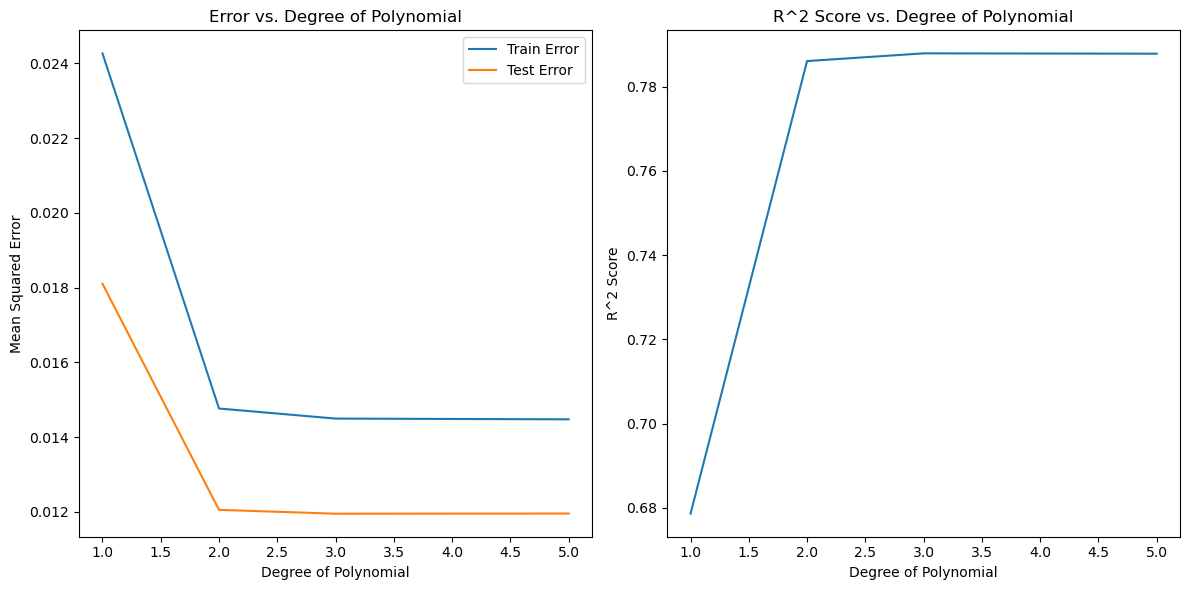

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que ya tienes tu DataFrame llamado 'dataframe'

# Divide los datos en conjuntos de entrenamiento y prueba
X = dataframe['Year'].values.reshape(-1, 1)
y = dataframe['GlobalAvgTemp'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prueba varios grados de polinomio y evalúa el ajuste
degrees = [1, 2, 3, 4, 5]
train_errors = []
test_errors = []
r2_scores = []

for degree in degrees:
    # Transforma los datos con el grado del polinomio
    polynomial_features = PolynomialFeatures(degree=degree)
    X_train_poly = polynomial_features.fit_transform(X_train)
    X_test_poly = polynomial_features.transform(X_test)
    
    # Ajusta un modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Calcula el error cuadrático medio en ambos conjuntos
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    
    # Calcula el coeficiente de determinación (R^2)
    r2 = r2_score(y_test, y_test_pred)
    
    train_errors.append(train_error)
    test_errors.append(test_error)
    r2_scores.append(r2)

# Visualización de los resultados
plt.figure(figsize=(12, 6))

# Gráfico de error cuadrático medio en conjuntos de entrenamiento y prueba
plt.subplot(1, 2, 1)
plt.plot(degrees, train_errors, label='Train Error')
plt.plot(degrees, test_errors, label='Test Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.title('Error vs. Degree of Polynomial')
plt.legend()

# Gráfico de coeficiente de determinación (R^2)
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_scores, label='R^2 Score')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs. Degree of Polynomial')

plt.tight_layout()
plt.show()

## Short term years: Linear Regression

### Last 100: Decades

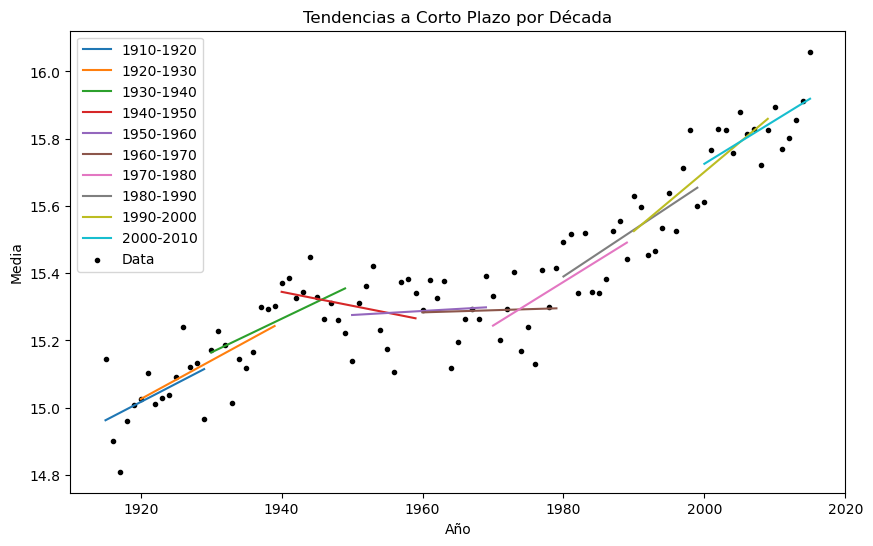

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para los últimos 100 años
current_year = dataframe['Year'].max()
start_year = current_year - 100
filtered_df = dataframe[dataframe['Year'] >= start_year]

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar a través de las décadas y crear líneas de tendencia para cada tramo ascendente y descendente
unique_decades = filtered_df['Decade'].unique()
for i in range(len(unique_decades) - 1):
    current_decade = unique_decades[i]
    next_decade = unique_decades[i + 1]
    subset_df = filtered_df[(filtered_df['Decade'] >= current_decade) & (filtered_df['Decade'] <= next_decade)]

    # Calcular la línea de tendencia usando polyfit y crear la línea correspondiente
    coeffs = np.polyfit(subset_df['Year'], subset_df['GlobalAvgTemp'], 1)
    trend_line = np.polyval(coeffs, subset_df['Year'])

    # Plotear la línea de tendencia
    ax.plot(subset_df['Year'], trend_line, label=f"{current_decade}-{next_decade}")

# Agregar los datos reales al gráfico
ax.scatter(filtered_df['Year'], filtered_df['GlobalAvgTemp'], color='black', marker='.', label='Data')

# Configurar etiquetas y leyendas
ax.set_xlabel('Año')
ax.set_ylabel('Media')
ax.set_title('Tendencias a Corto Plazo por Década')
ax.legend()

# Mostrar el gráfico
plt.show()


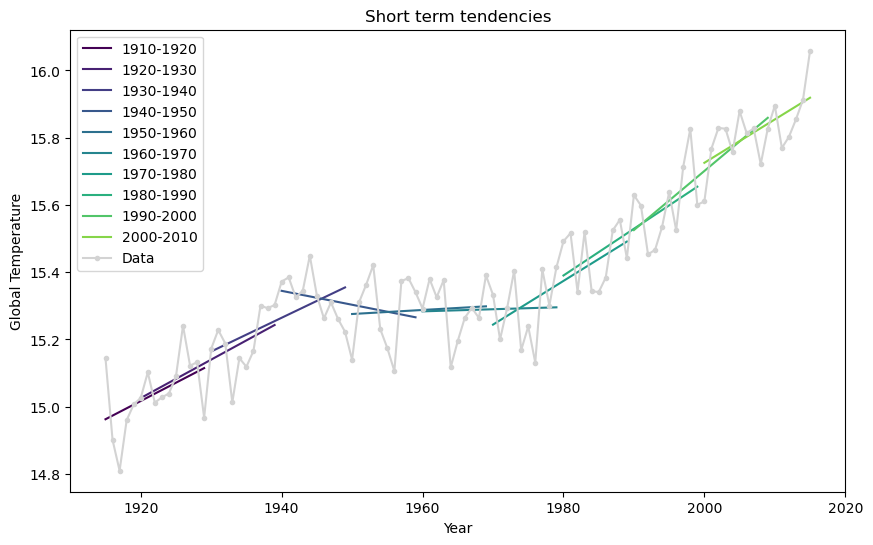

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para los últimos 100 años
current_year = dataframe['Year'].max()
start_year = current_year - 100
filtered_df = dataframe[dataframe['Year'] >= start_year]

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar a través de las décadas y crear líneas de tendencia para cada tramo ascendente y descendente
unique_decades = filtered_df['Decade'].unique()
for i in range(len(unique_decades) - 1):
    current_decade = unique_decades[i]
    next_decade = unique_decades[i + 1]
    subset_df = filtered_df[(filtered_df['Decade'] >= current_decade) & (filtered_df['Decade'] <= next_decade)]

    # Calcular la línea de tendencia usando polyfit y crear la línea correspondiente
    coeffs = np.polyfit(subset_df['Year'], subset_df['GlobalAvgTemp'], 1)
    trend_line = np.polyval(coeffs, subset_df['Year'])

    # Plotear la línea de tendencia con el color correspondiente
    color = plt.cm.viridis(i / len(unique_decades))  # Color diferente para cada década
    ax.plot(subset_df['Year'], trend_line, label=f"{current_decade}-{next_decade}", color=color)

# Plotear los datos reales con una línea que los conecte
ax.plot(filtered_df['Year'], filtered_df['GlobalAvgTemp'], color='lightgray', marker='.', linestyle='-', label='Data')

# Configurar etiquetas y leyendas
ax.set_xlabel('Year')
ax.set_ylabel('Global Temperature')
ax.set_title('Short term tendencies')
ax.legend()

# Mostrar el gráfico
plt.show()


### Zoom tendencias 1940 - 1980

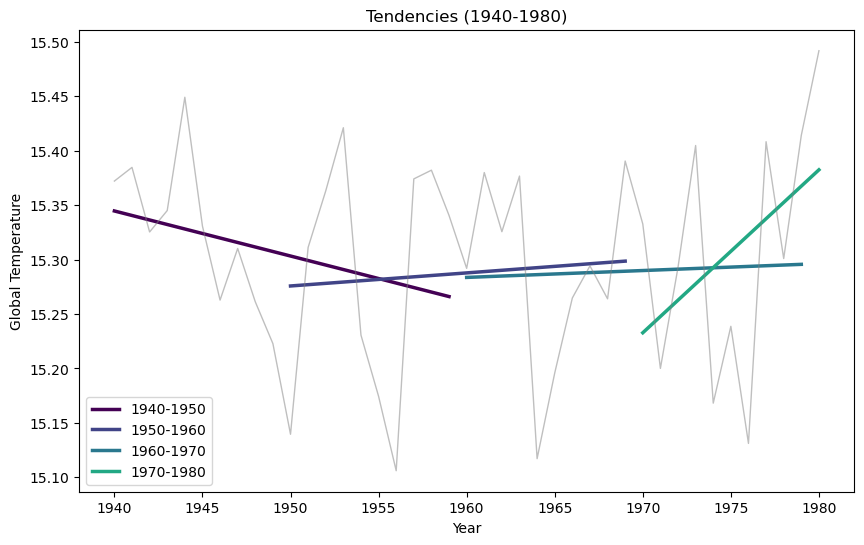

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filtrar los datos para el intervalo de años 1940-1980
filtered_df = dataframe[(dataframe['Year'] >= 1940) & (dataframe['Year'] <= 1980)]

# Crear una figura y ejes para la visualización
fig, ax = plt.subplots(figsize=(10, 6))

# Iterar a través de las décadas y crear líneas de tendencia para cada una
unique_decades = filtered_df['Decade'].unique()
for i in range(len(unique_decades) - 1):
    current_decade = unique_decades[i]
    next_decade = unique_decades[i + 1]
    subset_df = filtered_df[(filtered_df['Decade'] >= current_decade) & (filtered_df['Decade'] <= next_decade)]

    # Calcular la línea de tendencia usando polyfit y crear la línea correspondiente
    coeffs = np.polyfit(subset_df['Year'], subset_df['GlobalAvgTemp'], 1)
    trend_line = np.polyval(coeffs, subset_df['Year'])

    # Plotear la línea de tendencia con el color correspondiente y más ancho
    color = plt.cm.viridis(i / len(unique_decades))  # Color diferente para cada década
    ax.plot(subset_df['Year'], trend_line, label=f"{current_decade}-{next_decade}", color=color, linewidth=2.5)

# Plotear los datos reales con una línea tenue que los conecte
ax.plot(filtered_df['Year'], filtered_df['GlobalAvgTemp'], color='gray', linestyle='-', linewidth=1, alpha=0.5)

# Configurar etiquetas y leyendas
ax.set_xlabel('Year')
ax.set_ylabel('Global Temperature')
ax.set_title('Tendencies (1940-1980)')
ax.legend()

# Mostrar el gráfico
plt.show()


In [27]:
df_filtered = df['Year'] >= 1900
x = df[df_filtered]

x['GlobalAvgTemp'].mean()

15.31703017241379